In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jaipur.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Taxi Chick-Inn,600,"North Indian,Fast Food",Jaipur,C Scheme,Quick Bites,12noon to 12midnight(Mon-Sun),Good,3.8,1323
1,Poppin Cafe,800,"Cafe,Italian,North Indian,Chinese",Jaipur,C Scheme,Café,"12noon to 11pm(Mon),12noon to 12midnight...",Very Good,4.3,1028
2,Subway,500,"Healthy Food,Sandwich,Salad",Jaipur,C Scheme,Quick Bites,9am to 130am(Mon-Sun),Very Good,4.0,535
3,Muhammadi Palace,450,"North Indian,Mughlai",Jaipur,Sindhi Camp,Casual Dining,9am to 12midnight(Mon-Sun),Good,3.9,2463
4,Fat Lulu's,1300,"Continental,Pizza,Burger,American",Jaipur,Suryavanshi Pearl-- C Scheme,Casual Dining,11am to 2am(Mon-Sun),Very Good,4.3,679


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 10 columns):
Name                2011 non-null object
Price               2011 non-null int64
Cuisine_Category    2011 non-null object
City                2011 non-null object
Region              2011 non-null object
Cuisine_Type        2011 non-null object
Timing              2010 non-null object
Rating_Types        2011 non-null object
Rating              2011 non-null float64
Votes               2011 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 157.2+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,2011.000000,2011.000000,2011.000000
mean,445.985579,3.465639,152.694182
std,330.731227,0.406866,316.882059
min,0.000000,2.200000,4.000000
25%,250.000000,3.200000,17.000000
50%,400.000000,3.400000,46.000000
75%,500.000000,3.700000,140.000000
max,6000.000000,4.900000,5675.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              1
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Khandelwal Dhaba    4
Roll Express        3
Punjabi Dhaba       3
Saini Dhaba         3
Pizza King          3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Mansarovar          252
Malviya Nagar       233
Tonk Road           230
Vaishali Nagar      187
Raja Park           118
C Scheme            118
Shyam Nagar          63
Vidhyadhar Nagar     55
Sodala               51
Pink City            49
Name: Region, dtype: int64

Text(0.5,1,'Region')

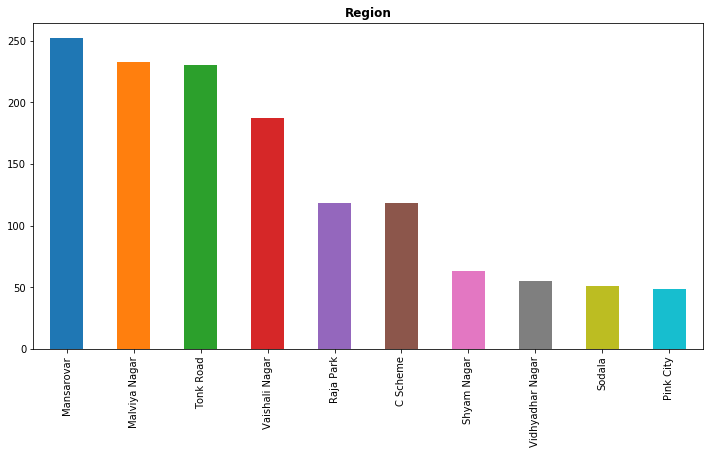

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

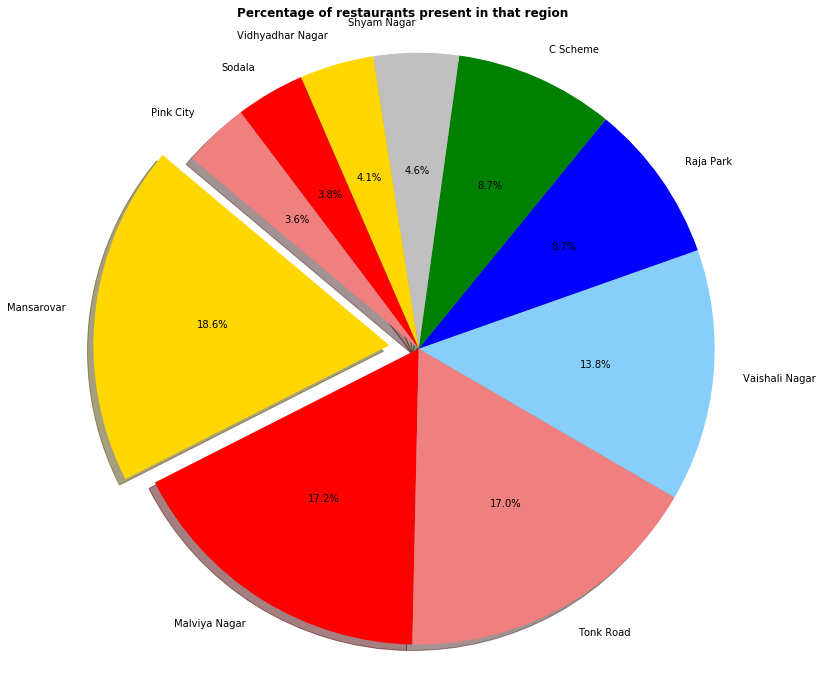

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average         994
Good            761
Very Good       220
Excellent        17
Poor             13
Promedio          1
Média             1
Wybitnie          1
Skvělá volba      1
Bueno             1
Name: Rating_Types, dtype: int64

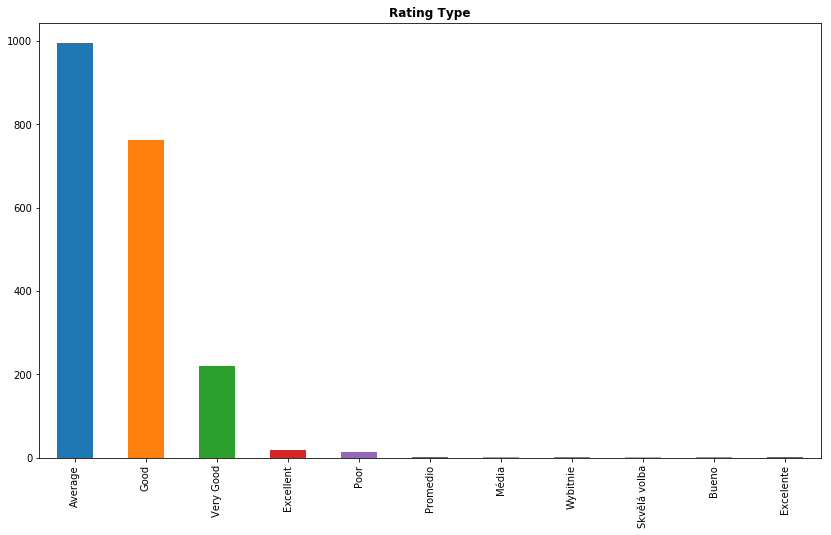

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       741
Casual Dining     467
none              205
Café              176
Dhaba              84
Bakery             84
Sweet Shop         72
Dessert Parlor     44
Beverage Shop      27
Food Court         21
Name: Cuisine_Type, dtype: int64

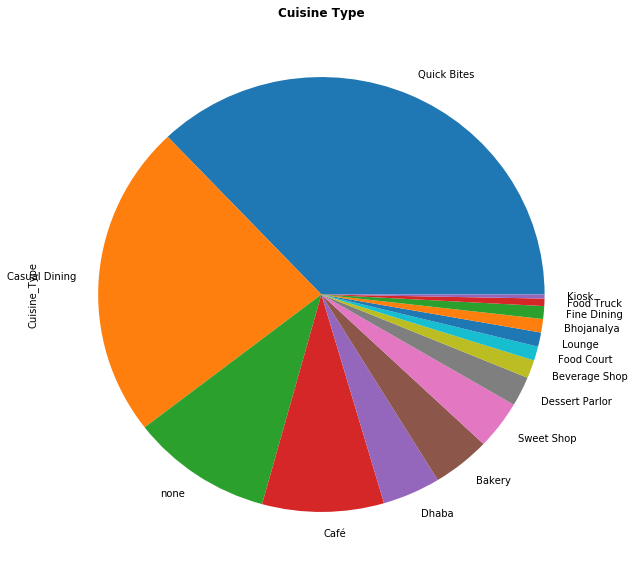

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.465373134328359


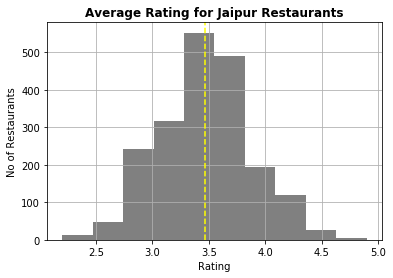

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jaipur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Jaipur is found to be around 3.46

# Top cuisines in Jaipur

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

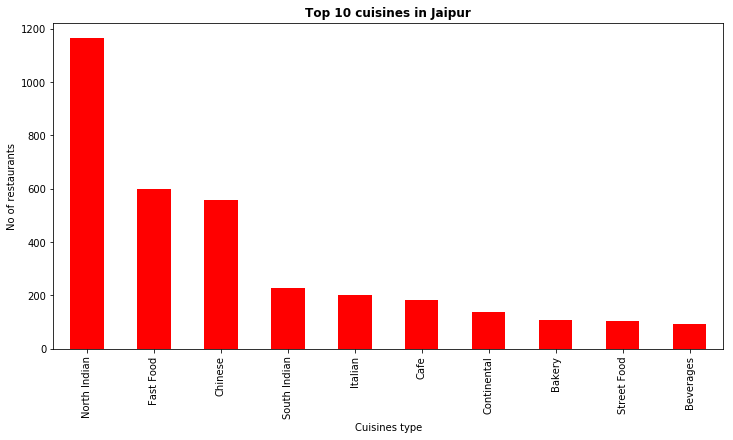

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jaipur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     334
200     272
400     252
500     232
600     124
250     124
150     117
350      86
800      83
700      60
1000     54
100      54
450      48
1200     24
750      20
550      18
900      17
650      17
1500     11
850       9
Name: Price, dtype: int64

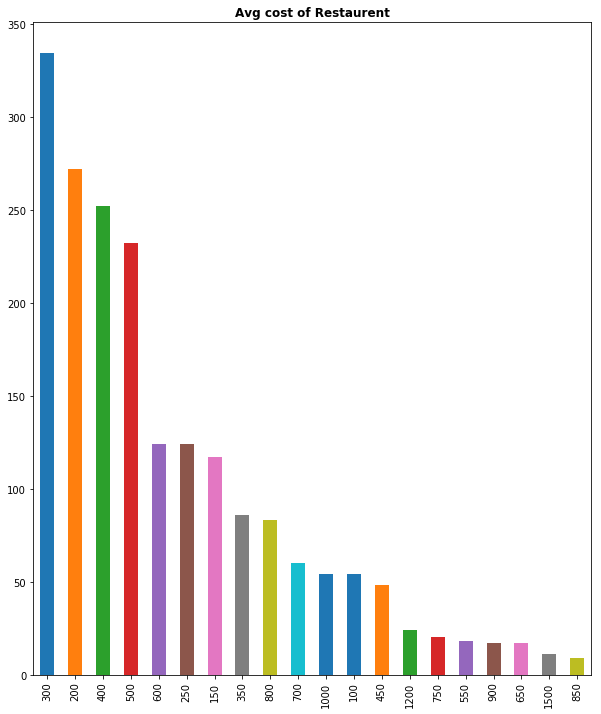

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

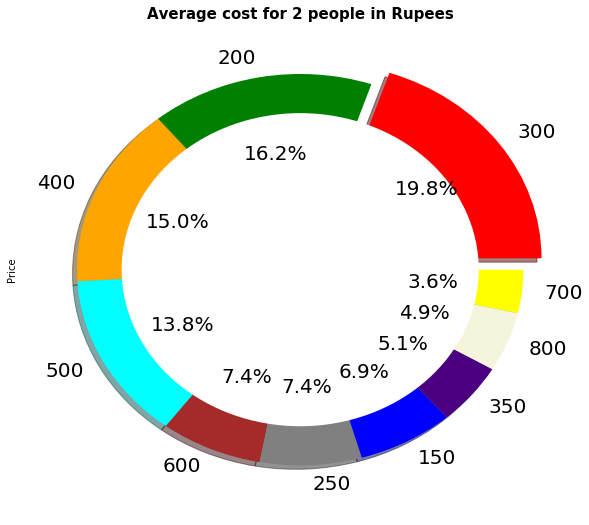

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300